# projet realiser en collabaratoire avec l'ingerieur salah Eddine & souheib

### conception & inplemantation 

# P1. MODEM QAM

## CONCEPTION & IMPLEMENTATION (PYTHON)

Nombre de bits par symbole (ex: 2, 4, 6, 8) :  6


1. Gray
2. Decimal


Choisir le type de codage (1 ou 2) :  1


1. top-left
2. top-right
3. bottom-left
4. bottom-right


Position du premier symbole (1-4) :  1


=== Tableau de correspondance ===
Bits	Déc	I	Q	Énergie		Phase (°)
000000	0	-7.00	7.00	98.0000	135.00
000001	1	-5.00	7.00	74.0000	125.54
000011	3	-3.00	7.00	58.0000	113.20
000010	2	-1.00	7.00	50.0000	98.13
000110	6	1.00	7.00	50.0000	81.87
000111	7	3.00	7.00	58.0000	66.80
000101	5	5.00	7.00	74.0000	54.46
000100	4	7.00	7.00	98.0000	45.00
001100	12	-7.00	5.00	74.0000	144.46
001101	13	-5.00	5.00	50.0000	135.00
001111	15	-3.00	5.00	34.0000	120.96
001110	14	-1.00	5.00	26.0000	101.31
001010	10	1.00	5.00	26.0000	78.69
001011	11	3.00	5.00	34.0000	59.04
001001	9	5.00	5.00	50.0000	45.00
001000	8	7.00	5.00	74.0000	35.54
011000	24	-7.00	3.00	58.0000	156.80
011001	25	-5.00	3.00	34.0000	149.04
011011	27	-3.00	3.00	18.0000	135.00
011010	26	-1.00	3.00	10.0000	108.43
011110	30	1.00	3.00	10.0000	71.57
011111	31	3.00	3.00	18.0000	45.00
011101	29	5.00	3.00	34.0000	30.96
011100	28	7.00	3.00	58.0000	23.20
010100	20	-7.00	1.00	50.0000	171.87
010101	21	-5.00	1.00	26.0000	168.69
010111	23	-3.00	1.00	10.0000	161.

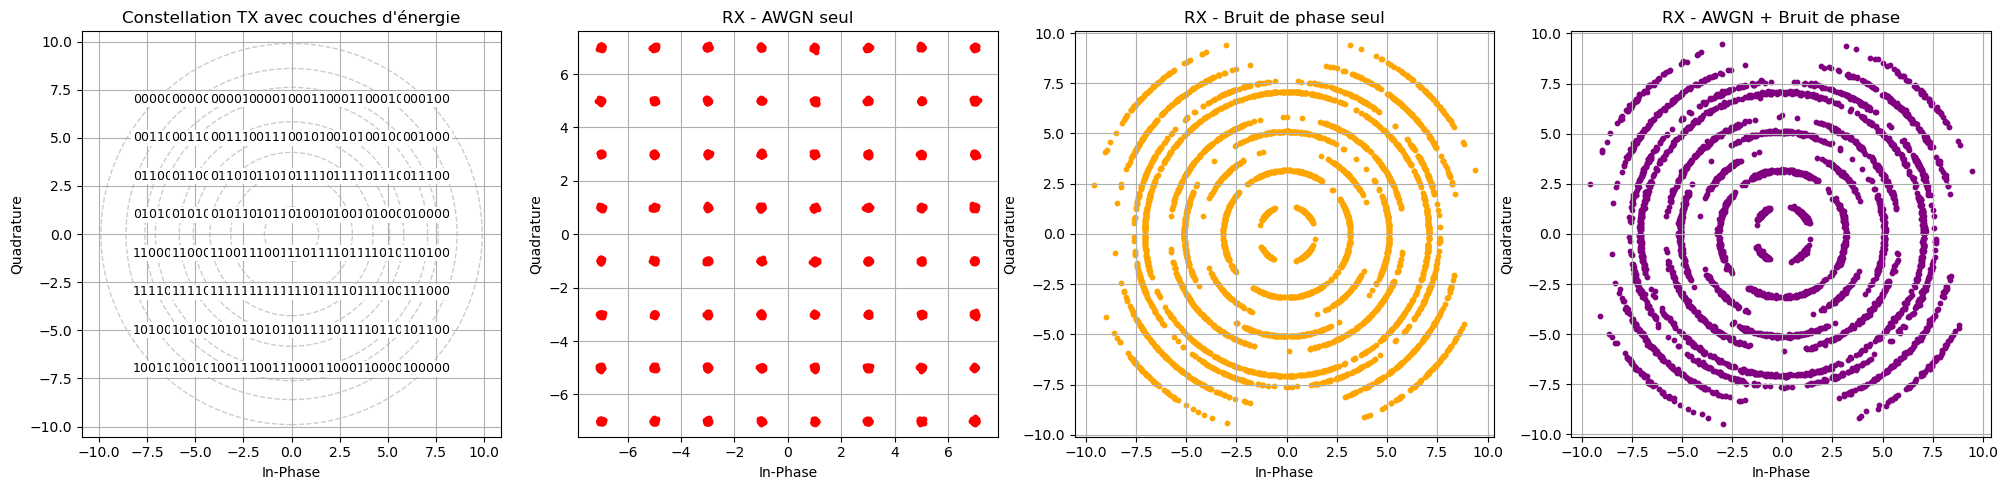

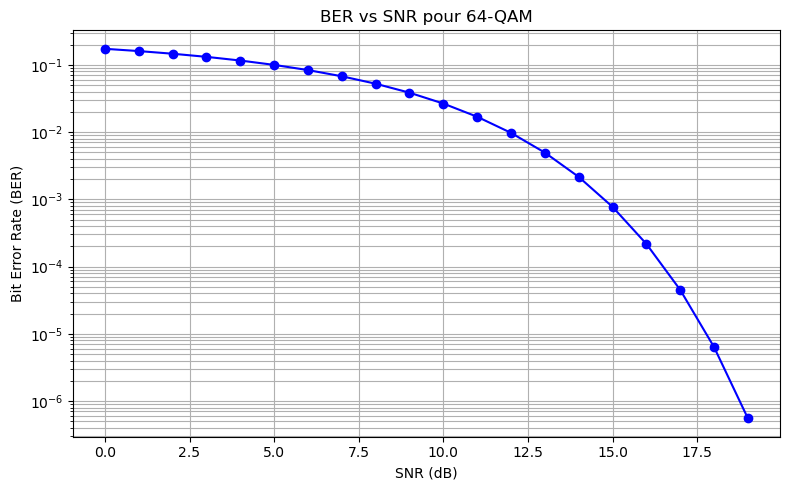


=== Calculs supplémentaires ===
SNR utilisé : 15 dB
BER estimé à 15 dB : 7.724722e-04


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc

def gray_code(n):
    return n ^ (n >> 1)

def generate_gray_sequence(M):
    return [gray_code(i) for i in range(M)]

def bits_to_str(bits, n):
    return format(bits, f'0{n}b')

class QAMSimulator:
    def __init__(self, bits, code_type, position):
        self.bits_per_symbol = bits
        self.gray_coding = code_type.lower() == 'gray'
        self.first_symbol_pos = position.lower()
        self.M = 2 ** bits
        self.N = int(np.sqrt(self.M))
        self.generate_constellation()
        self.compute_table()
        self.plot_constellations()
        self.plot_ber_curve()
        self.compute_ber_snr()

    def generate_constellation(self):
        # Création grille QAM (pas de normalisation circulaire)
        x = np.arange(-self.N + 1, self.N, 2)
        xv, yv = np.meshgrid(x, x)

        if self.first_symbol_pos == 'top-left':
            yv = yv[::-1]
        elif self.first_symbol_pos == 'top-right':
            xv = xv[:, ::-1]
            yv = yv[::-1]
        elif self.first_symbol_pos == 'bottom-right':
            xv = xv[:, ::-1]

        self.I = xv.flatten()
        self.Q = yv.flatten()
        self.symbols = self.I + 1j * self.Q  # QAM : carré, pas cercle

        self.energy = np.abs(self.symbols) ** 2
        self.phase = np.angle(self.symbols, deg=True)

    def compute_table(self):
        self.bits_list = []
        self.decimal_list = []
        self.symbol_list = []
        self.i_list = []
        self.q_list = []
        self.energy_list = []
        self.phase_list = []

        indices = range(self.M)
        labels = generate_gray_sequence(self.M) if self.gray_coding else list(indices)

        for i, symbol in enumerate(self.symbols):
            bits = bits_to_str(labels[i], self.bits_per_symbol)
            self.bits_list.append(bits)
            self.decimal_list.append(labels[i])
            self.symbol_list.append(symbol)
            self.i_list.append(symbol.real)
            self.q_list.append(symbol.imag)
            self.energy_list.append(np.abs(symbol) ** 2)
            self.phase_list.append(np.angle(symbol, deg=True))

        self.avg_energy = np.mean(self.energy_list)
        self.var_energy = np.var(self.energy_list)
        self.avg_phase = np.mean(self.phase_list)
        self.var_phase = np.var(self.phase_list)

        print("=== Tableau de correspondance ===")
        print("Bits\tDéc\tI\tQ\tÉnergie\t\tPhase (°)")
        for i in range(self.M):
            print(f"{self.bits_list[i]}\t{self.decimal_list[i]}\t{self.i_list[i]:.2f}\t{self.q_list[i]:.2f}\t{self.energy_list[i]:.4f}\t{self.phase_list[i]:.2f}")

        print("\n=== Bilan énergie / phase ===")
        print(f"Energie moyenne : {self.avg_energy:.4f}")
        print(f"Variation d'énergie : {self.var_energy:.4f}")
        print(f"Phase moyenne (°) : {self.avg_phase:.2f}")
        print(f"Variation de phase : {self.var_phase:.2f}")

    def plot_constellations(self):
        fig, ax = plt.subplots(1, 4, figsize=(20, 5))

        # TX
        ax[0].scatter(self.I, self.Q, c='black')
        for i in range(len(self.symbols)):
            label = self.bits_list[i] if self.gray_coding else self.decimal_list[i]
            ax[0].text(self.I[i], self.Q[i], str(label), fontsize=9, ha='center', va='center',
                      bbox=dict(facecolor='white', edgecolor='none', pad=1))

        # Couches d'énergie
        radii = np.unique(np.round(np.sqrt(np.unique(self.energy_list)), 2))
        for r in radii:
            circle = plt.Circle((0, 0), r, color='gray', fill=False, linestyle='--', alpha=0.4)
            ax[0].add_patch(circle)

        ax[0].set_title("Constellation TX avec couches d'énergie")
        ax[0].grid(True)
        ax[0].set_xlabel("In-Phase")
        ax[0].set_ylabel("Quadrature")
        ax[0].axis('equal')

        # === RX Simulations ===
        snr_db = 25
        snr_linear = 10**(snr_db / 10)
        noise_power = 1 / snr_linear
        phase_noise_deg = 10
        Nsym = self.M * 64

        tx_extended = np.tile(self.symbols, int(Nsym / self.M))

        # Bruit AWGN
        awgn = np.sqrt(noise_power / 2) * (np.random.randn(Nsym) + 1j * np.random.randn(Nsym))
        rx_awgn = tx_extended + awgn

        # Bruit de phase
        phase_noise_rad = np.deg2rad(np.random.normal(0, phase_noise_deg, Nsym))
        rx_phase = tx_extended * np.exp(1j * phase_noise_rad)

        # Les deux combinés
        rx_combined = tx_extended * np.exp(1j * phase_noise_rad) + awgn

        # RX - AWGN
        ax[1].scatter(rx_awgn.real, rx_awgn.imag, c='red', s=10)
        ax[1].set_title("RX - AWGN seul")
        ax[1].grid(True)
        ax[1].set_xlabel("In-Phase")
        ax[1].set_ylabel("Quadrature")
        ax[1].axis('equal')

        # RX - Bruit de phase seul
        ax[2].scatter(rx_phase.real, rx_phase.imag, c='orange', s=10)
        ax[2].set_title("RX - Bruit de phase seul")
        ax[2].grid(True)
        ax[2].set_xlabel("In-Phase")
        ax[2].set_ylabel("Quadrature")
        ax[2].axis('equal')

        # RX - Les deux
        ax[3].scatter(rx_combined.real, rx_combined.imag, c='purple', s=10)
        ax[3].set_title("RX - AWGN + Bruit de phase")
        ax[3].grid(True)
        ax[3].set_xlabel("In-Phase")
        ax[3].set_ylabel("Quadrature")
        ax[3].axis('equal')

        plt.tight_layout()
        plt.show()

    def ber_awgn(self, snr_db):
        M = self.M
        k = np.log2(M)
        snr_linear = 10**(snr_db/10)
        return 2*(1 - 1/np.sqrt(M)) * erfc(np.sqrt(3*k*snr_linear/(2*(M-1)))) / k

    def plot_ber_curve(self):
        snr_range = np.arange(0, 20, 1)
        ber = [self.ber_awgn(snr) for snr in snr_range]

        plt.figure(figsize=(8, 5))
        plt.semilogy(snr_range, ber, 'b-o')
        plt.grid(True, which='both')
        plt.title(f'BER vs SNR pour {self.M}-QAM')
        plt.xlabel('SNR (dB)')
        plt.ylabel('Bit Error Rate (BER)')
        plt.tight_layout()
        plt.show()

    def compute_ber_snr(self):
        snr_db = 15
        ber_val = self.ber_awgn(snr_db)
        print(f"\n=== Calculs supplémentaires ===")
        print(f"SNR utilisé : {snr_db} dB")
        print(f"BER estimé à {snr_db} dB : {ber_val:.6e}")

# === Lancement ===
try:
    bits = int(input("Nombre de bits par symbole (ex: 2, 4, 6, 8) : "))
    assert bits >= 1 and bits <= 10
except:
    bits = 4

print("1. Gray\n2. Decimal")
code = input("Choisir le type de codage (1 ou 2) : ")
code = 'Gray' if code == '1' else 'Decimal'

print("1. top-left\n2. top-right\n3. bottom-left\n4. bottom-right")
position = input("Position du premier symbole (1-4) : ")
positions_map = {'1': 'top-left', '2': 'top-right', '3': 'bottom-left', '4': 'bottom-right'}
position = positions_map.get(position, 'bottom-left')

qam = QAMSimulator(bits, code, position)


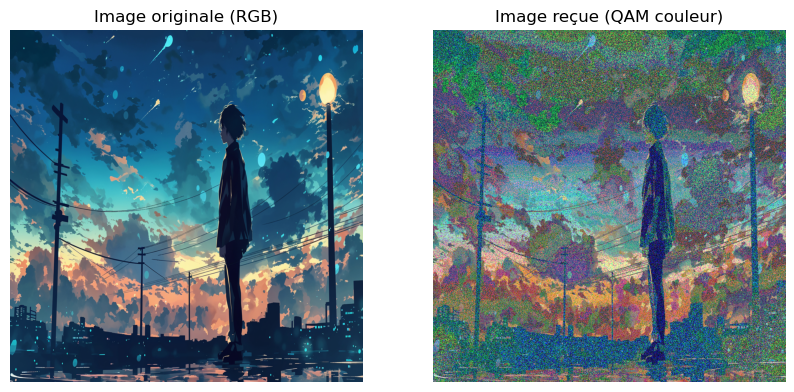

🔴 BER Rouge   : 2.3450e-01
🟢 BER Vert    : 2.4107e-01
🔵 BER Bleu    : 2.6829e-01
📊 BER Moyen   : 2.4795e-01


In [79]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def decimal_to_gray(n):
    return n ^ (n >> 1)

def int_to_bin_list(n, bits):
    return list(map(int, bin(n)[2:].zfill(bits)))

def calculate_ber(original_bits, received_bits):
    errors = np.sum(np.array(original_bits) != np.array(received_bits))
    return errors / len(original_bits)

def add_noise(symbols, snr_db=10, phase_offset_deg=15):
    snr_linear = 10 ** (snr_db / 10)
    noise_power = 1 / snr_linear
    noise = np.sqrt(noise_power/2) * (np.random.randn(len(symbols)) + 1j*np.random.randn(len(symbols)))
    rotated = symbols * np.exp(1j * np.deg2rad(phase_offset_deg))
    return rotated + noise

def detect_symbols(received_symbols, table):
    constellation = np.array([entry['symbol'] for entry in table])
    bits_table = [entry['bits'] for entry in table]
    detected_bits = []
    for sym in received_symbols:
        idx = np.argmin(np.abs(sym - constellation))
        detected_bits.extend(bits_table[idx])
    return detected_bits

def generate_circular_qam_mapping(M, use_gray=False):
    bits_per_symbol = int(np.log2(M))
    mapping = []

    if M == 16:
        rings = [1, 5, 10]
    else:
        raise NotImplementedError("Constellation circulaire implémentée uniquement pour M=16.")

    radii = np.linspace(0.4, 1.0, len(rings))
    angle_offset = np.pi / 4

    symbol_index = 0
    for ring_idx, (num_points, radius) in enumerate(zip(rings, radii)):
        for point_idx in range(num_points):
            angle = 2 * np.pi * point_idx / num_points + (angle_offset if ring_idx % 2 == 1 else 0)
            i = radius * np.cos(angle)
            q = radius * np.sin(angle)
            symbol = complex(i, q)

            decimal = symbol_index
            gray = decimal_to_gray(decimal) if use_gray else decimal
            bits = int_to_bin_list(gray, bits_per_symbol)

            mapping.append({
                'symbol': symbol,
                'bits': bits,
                'decimal': decimal,
                'I': i,
                'Q': q,
                'energy': abs(symbol)**2,
                'phase': np.angle(symbol)
            })
            symbol_index += 1
    return mapping

def channel_to_bits(channel):
    flat_pixels = channel.flatten()
    bits = []
    for pixel in flat_pixels:
        bits.extend(int_to_bin_list(pixel, 8))
    return bits

def bits_to_channel(bits, size):
    pixels = []
    for i in range(0, len(bits), 8):
        byte = bits[i:i+8]
        if len(byte) < 8:
            break
        value = int(''.join(map(str, byte)), 2)
        pixels.append(value)
    return np.array(pixels, dtype=np.uint8).reshape(size[1], size[0])

def bits_to_symbols(bits, table, bits_per_symbol):
    symbols = []
    for i in range(0, len(bits), bits_per_symbol):
        bit_chunk = bits[i:i+bits_per_symbol]
        for entry in table:
            if entry['bits'] == bit_chunk:
                symbols.append(entry['symbol'])
                break
    return np.array(symbols)

# --- Transmet un seul canal (R, G ou B) ---
def process_channel(channel_array, table, snr_db, phase_offset_deg):
    bits_per_symbol = int(np.log2(len(table)))
    bits = channel_to_bits(channel_array)

    padding = (-len(bits)) % bits_per_symbol
    bits += [0] * padding

    tx_symbols = bits_to_symbols(bits, table, bits_per_symbol)
    rx_symbols = add_noise(tx_symbols, snr_db, phase_offset_deg)
    received_bits = detect_symbols(rx_symbols, table)
    received_bits = received_bits[:len(bits) - padding]

    reconstructed = bits_to_channel(received_bits, channel_array.shape)
    ber = calculate_ber(bits[:len(received_bits)], received_bits)
    return reconstructed, ber

# --- Transmission complète RGB ---
def transmit_image_qam_rgb(image_path, M=16, use_gray=True, snr_db=10, phase_offset_deg=15):
    img = Image.open(image_path).convert('RGB').resize((1024, 1024))
    img_array = np.array(img)
    table = generate_circular_qam_mapping(M, use_gray)

    R, G, B = img_array[:, :, 0], img_array[:, :, 1], img_array[:, :, 2]

    R_rx, ber_r = process_channel(R, table, snr_db, phase_offset_deg)
    G_rx, ber_g = process_channel(G, table, snr_db, phase_offset_deg)
    B_rx, ber_b = process_channel(B, table, snr_db, phase_offset_deg)

    received_img = np.stack((R_rx, G_rx, B_rx), axis=2)
    img_rx = Image.fromarray(received_img, mode='RGB')

    # Affichage
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title("Image originale (RGB)")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(img_rx)
    plt.title("Image reçue (QAM couleur)")
    plt.axis('off')
    plt.show()

    print(f"🔴 BER Rouge   : {ber_r:.4e}")
    print(f"🟢 BER Vert    : {ber_g:.4e}")
    print(f"🔵 BER Bleu    : {ber_b:.4e}")
    print(f"📊 BER Moyen   : {(ber_r + ber_g + ber_b) / 3:.4e}")

# 🔽 LANCEMENT
image_path = "C:\\Users\\LAPTOP\\anime-night-sky-illustration.jpg"
transmit_image_qam_rgb(image_path, M=16, use_gray=True, snr_db=10, phase_offset_deg=15)
